Mobina SalimiPanah - 99109788

# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm


#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [122]:
data = pd.read_csv('bank-full.csv', delimiter=';')
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [123]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace('"', '')


In [124]:
#TODO
X = data.drop('y', axis=1)
y = data['y']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=37)


#Normalize data
normalize numerical data.

In [125]:

categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype != 'object']

X_numerical = X_train[numerical_features]

scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_numerical)

X_val_num_scaled = scaler.transform(X_val[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

X_train_cat_encoded = encoder.fit_transform(X_train[categorical_features])

X_val_cat_encoded = encoder.transform(X_val[categorical_features])
X_test_cat_encoded = encoder.transform(X_test[categorical_features])

X_train_prepared = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_val_prepared = np.concatenate([X_val_num_scaled, X_val_cat_encoded], axis=1)
X_test_prepared = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Create Data Loader
create data loader for pytorch

In [126]:
#TODO
X_train_tensor = torch.tensor(X_train_prepared, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_prepared, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_prepared, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Model
define your model in here

In [127]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(51, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = torch.sigmoid(self.output(x))
        return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [128]:
model = BankMarketingNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [129]:
#TODO

epochs = 20
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for data, target in tqdm(train_loader, total=len(train_loader), desc=f'Epoch {epoch+1}/{epochs}', unit='batch'):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data, target in tqdm(val_loader, total=len(val_loader), desc='Validation Loss', unit='batch'):
            output = model(data)
            loss = criterion(output.squeeze(), target)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')



Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1286.89batch/s]


Epoch 1/20: Train Loss: 0.2710, Validation Loss: 0.2219


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1348.32batch/s]


Epoch 2/20: Train Loss: 0.2171, Validation Loss: 0.2223


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1317.28batch/s]


Epoch 3/20: Train Loss: 0.2100, Validation Loss: 0.2153


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1257.48batch/s]


Epoch 4/20: Train Loss: 0.2044, Validation Loss: 0.2107


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1237.84batch/s]


Epoch 5/20: Train Loss: 0.1999, Validation Loss: 0.2086


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1427.19batch/s]


Epoch 6/20: Train Loss: 0.1965, Validation Loss: 0.2096


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1282.71batch/s]


Epoch 7/20: Train Loss: 0.1940, Validation Loss: 0.2067


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1420.22batch/s]


Epoch 8/20: Train Loss: 0.1907, Validation Loss: 0.2077


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1036.97batch/s]


Epoch 9/20: Train Loss: 0.1891, Validation Loss: 0.2063


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1143.58batch/s]


Epoch 10/20: Train Loss: 0.1868, Validation Loss: 0.2134


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 919.60batch/s]


Epoch 11/20: Train Loss: 0.1845, Validation Loss: 0.2066


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 765.77batch/s]


Epoch 12/20: Train Loss: 0.1826, Validation Loss: 0.2074


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1440.73batch/s]


Epoch 13/20: Train Loss: 0.1809, Validation Loss: 0.2087


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1357.06batch/s]


Epoch 14/20: Train Loss: 0.1792, Validation Loss: 0.2123


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1312.17batch/s]


Epoch 15/20: Train Loss: 0.1775, Validation Loss: 0.2082


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1305.91batch/s]


Epoch 16/20: Train Loss: 0.1759, Validation Loss: 0.2103


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1282.02batch/s]


Epoch 17/20: Train Loss: 0.1743, Validation Loss: 0.2114


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1244.55batch/s]


Epoch 18/20: Train Loss: 0.1727, Validation Loss: 0.2109


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1343.22batch/s]


Epoch 19/20: Train Loss: 0.1702, Validation Loss: 0.2135


Validation Loss: 100%|██████████| 142/142 [00:00<00:00, 1271.45batch/s]

Epoch 20/20: Train Loss: 0.1699, Validation Loss: 0.2147


### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

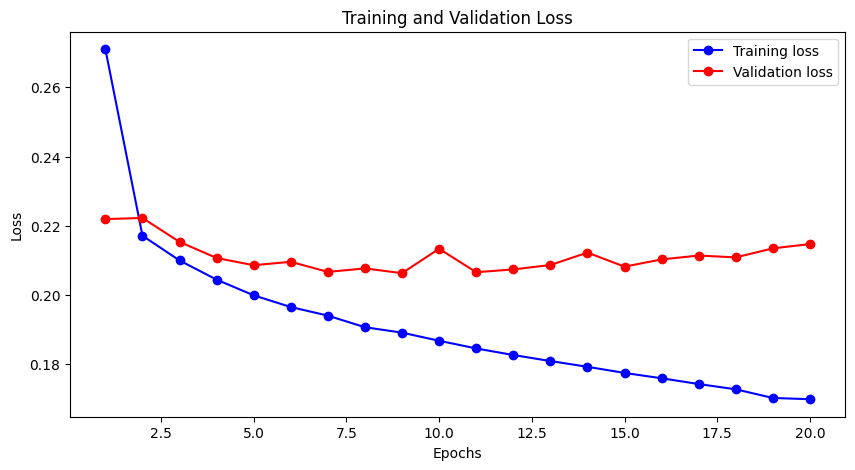

In [130]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'bo-', label='Training loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [131]:
model.eval()

BankMarketingNet(
  (fc1): Linear(in_features=51, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [132]:
#TODO
with torch.no_grad():
    correct = 0
    total = 0

    for data, targets in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy : {accuracy}%')


Accuracy : 88.51045007187881%
